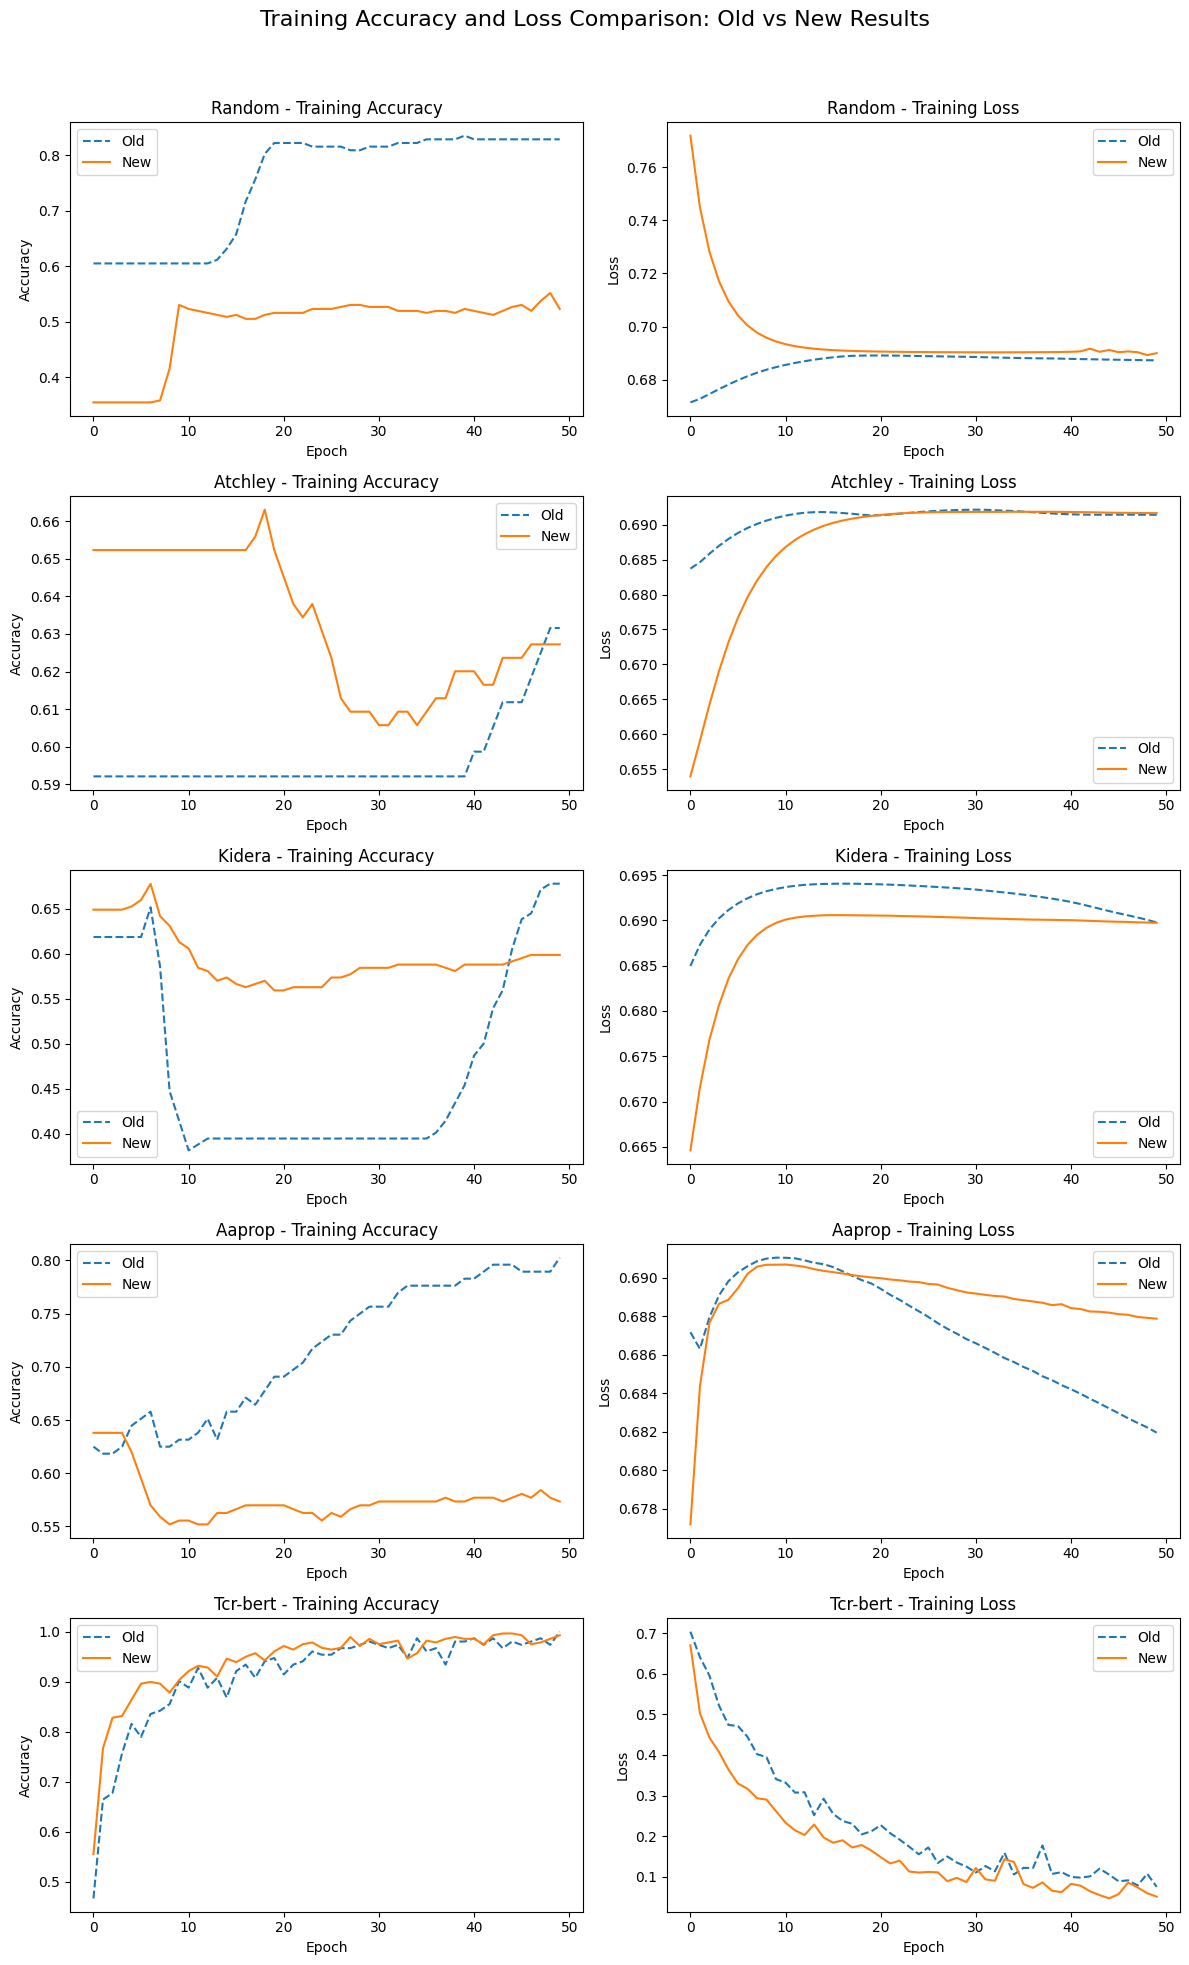

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file paths manually for each encoding
encoding_paths = {
    "random": {
        "new": "results-new/symbolic/random/trained-random-0/",
        "old": "results/symbolic/random/trained-random-4/"
    },
    "atchley": {
        "new": "results-new/symbolic/atchley/trained-atchley-0/",
        "old": "results/symbolic/atchley/trained-atchley-4/"
    },
    "kidera": {
        "new": "results-new/symbolic/kidera/trained-kidera-0/",
        "old": "results/symbolic/kidera/trained-kidera-4/"
    },
    "aaprop": {
        "new": "results-new/symbolic/aaprop/trained-aaprop-0/",
        "old": "results/symbolic/aaprop/trained-aaprop-4/"
    },
    "tcr-bert": {
        "new": "results-new/tcr-bert/trained-tcr-bert-0/",
        "old": "results/tcr-bert/trained-unidirectional-4/"
    }
}

# Function to load CSV data
def load_csv(filepath):
    try:
        return pd.read_csv(filepath, header=None).squeeze("columns")
    except FileNotFoundError:
        print(f"File not found: {filepath}")
        return None

# Plot comparisons
fig, axes = plt.subplots(len(encoding_paths), 2, figsize=(12, len(encoding_paths) * 4))
fig.suptitle("Training Accuracy and Loss Comparison: Old vs New Results", fontsize=16)

for i, (encoding, paths) in enumerate(encoding_paths.items()):
    new_acc_path = paths["new"] + "trainacc.csv"
    old_acc_path = paths["old"] + "trainacc.csv"
    new_loss_path = paths["new"] + "trainloss.csv"
    old_loss_path = paths["old"] + "trainloss.csv"
    
    new_acc = load_csv(new_acc_path)
    old_acc = load_csv(old_acc_path)
    new_loss = load_csv(new_loss_path)
    old_loss = load_csv(old_loss_path)
    
    if new_acc is not None and old_acc is not None:
        axes[i, 0].plot(old_acc, label="Old", linestyle="dashed")
        axes[i, 0].plot(new_acc, label="New", linestyle="solid")
        axes[i, 0].set_title(f"{encoding.capitalize()} - Training Accuracy")
        axes[i, 0].set_xlabel("Epoch")
        axes[i, 0].set_ylabel("Accuracy")
        axes[i, 0].legend()
    
    if new_loss is not None and old_loss is not None:
        axes[i, 1].plot(old_loss, label="Old", linestyle="dashed")
        axes[i, 1].plot(new_loss, label="New", linestyle="solid")
        axes[i, 1].set_title(f"{encoding.capitalize()} - Training Loss")
        axes[i, 1].set_xlabel("Epoch")
        axes[i, 1].set_ylabel("Loss")
        axes[i, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()